In [ ]:
# conda activate anndata

import os
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [189]:
psi_data = "tasic_2018_ALM_STAR_SyntheticDataset1_20pcntCells_35SD_200samples_SJ_pseudobulk_min_observed0.05_minPsi0.05_PSI"
corr_df = pd.read_csv(f"data/{psi_data}_exon_corr.csv", index_col=0)

### Prep PSI data

In [190]:
# Load PSI data
sdata = ad.read_h5ad("data/tasic_2018_ALM_STAR_SJ_counts_annotated_PSI.hd5")

In [191]:
sdata.shape

(9573, 14924)

In [192]:
# Load cell metadata and latent space
adata = ad.read_h5ad("data/tasic_2018_ALM_STAR_model/tasic_2018_ALM_STAR_gene_counts_scVI.h5ad")

In [193]:
sum(adata.obs_names == sdata.obs_names)

9573

In [194]:
sc.pp.neighbors(adata, use_rep="scVI")
sc.tl.umap(adata, min_dist=0.2)

### Visualize

In [196]:
ctypes = corr_df.columns[1:]
gene_names_df = corr_df['Gene']

In [214]:
i = 1
ctype = ctypes[i]
print(ctype)

# --------

corr_df = corr_df.sort_values(ctype, ascending=True)

top_exons_df = corr_df[ctype][1:10]
top_exons = top_exons_df.index.tolist()
top_genes = gene_names_df.loc[top_exons].tolist()

mask = sdata.var_names.isin(top_exons)
sdata_sub = sdata[:, mask]
psi_df = pd.DataFrame(
    sdata_sub.X, index=sdata_sub.obs_names, columns=sdata_sub.var_names
)

adata_temp = adata.copy()
adata_temp.obs = adata_temp.obs.join(psi_df)

Endo


In [215]:
top_exons_df

ENSMUSG00000038729_ProteinCoding_1    -0.915965
ENSMUSG00000039735_ProteinCoding_2    -0.907938
ENSMUSG00000031442_ProteinCoding_4    -0.902392
ENSMUSG00000041488_NMD_1              -0.900292
ENSMUSG00000031367_ProteinCoding_1    -0.879657
ENSMUSG00000025006_ProteinCoding_12   -0.877777
ENSMUSG00000060594_ProteinCoding_1    -0.868169
ENSMUSG00000056602_ProteinCoding_2    -0.864384
ENSMUSG00000028041_ProteinCoding_1    -0.857277
Name: Endo, dtype: float64

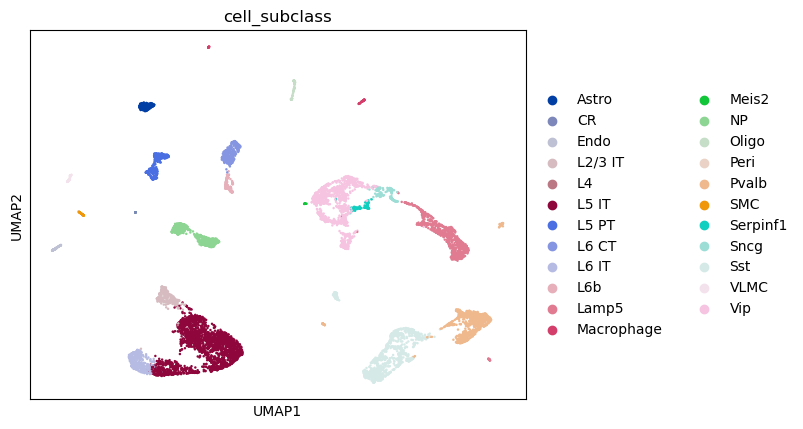

In [216]:
sc.pl.umap(adata_temp, color=["cell_subclass"])

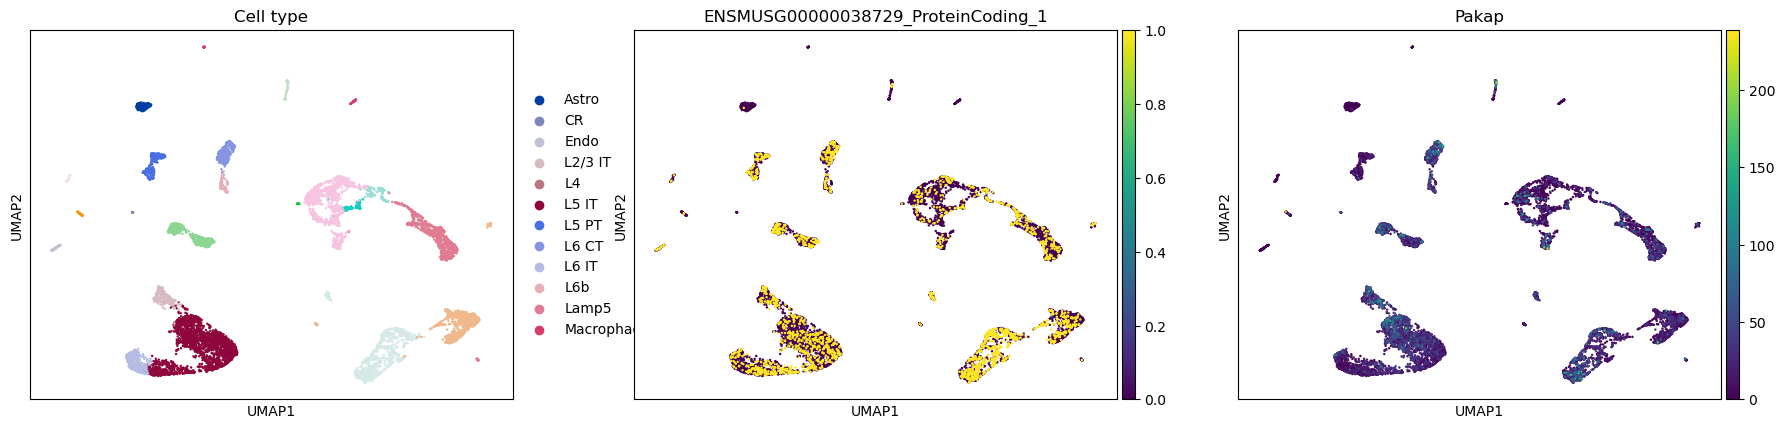

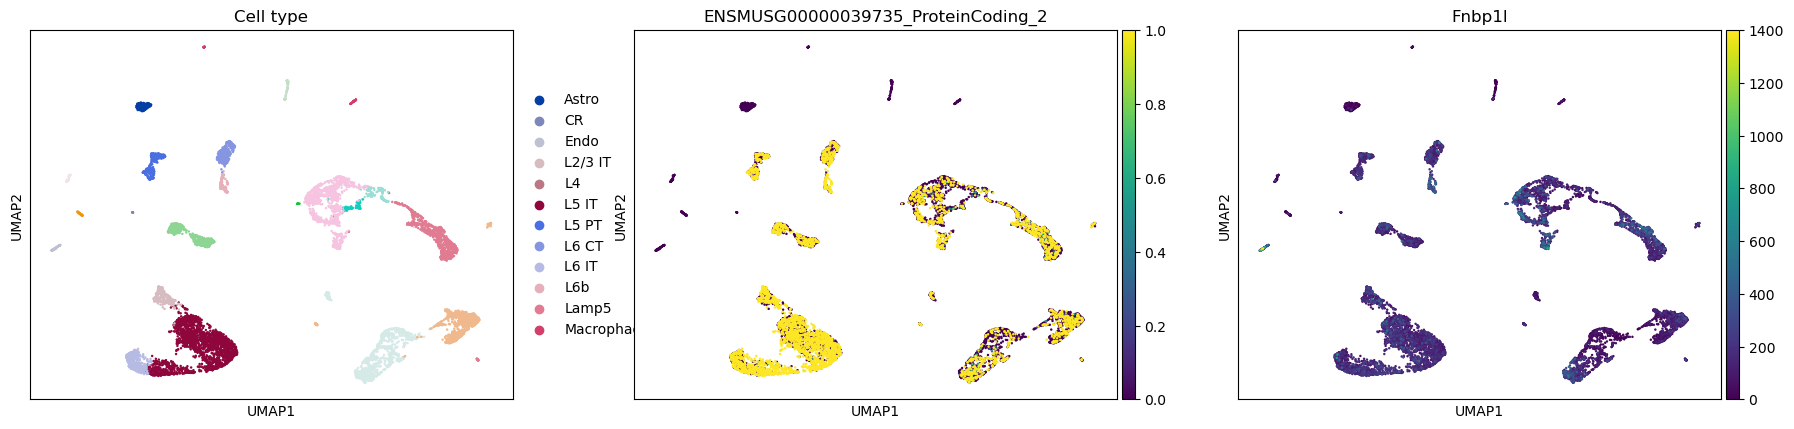

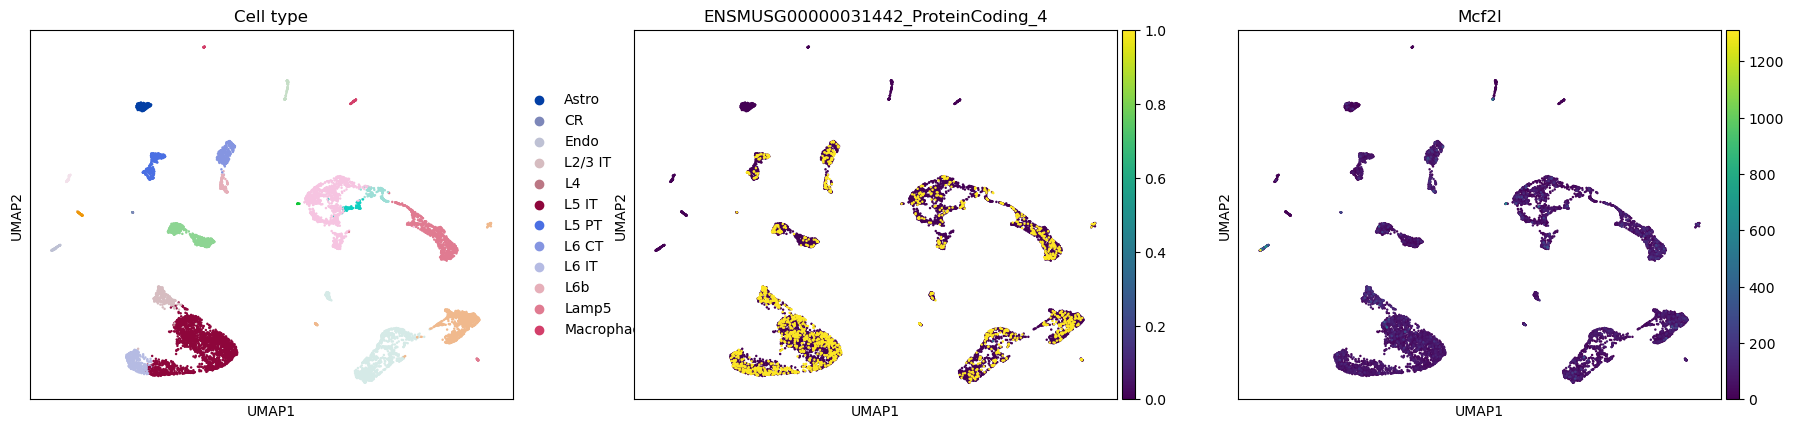

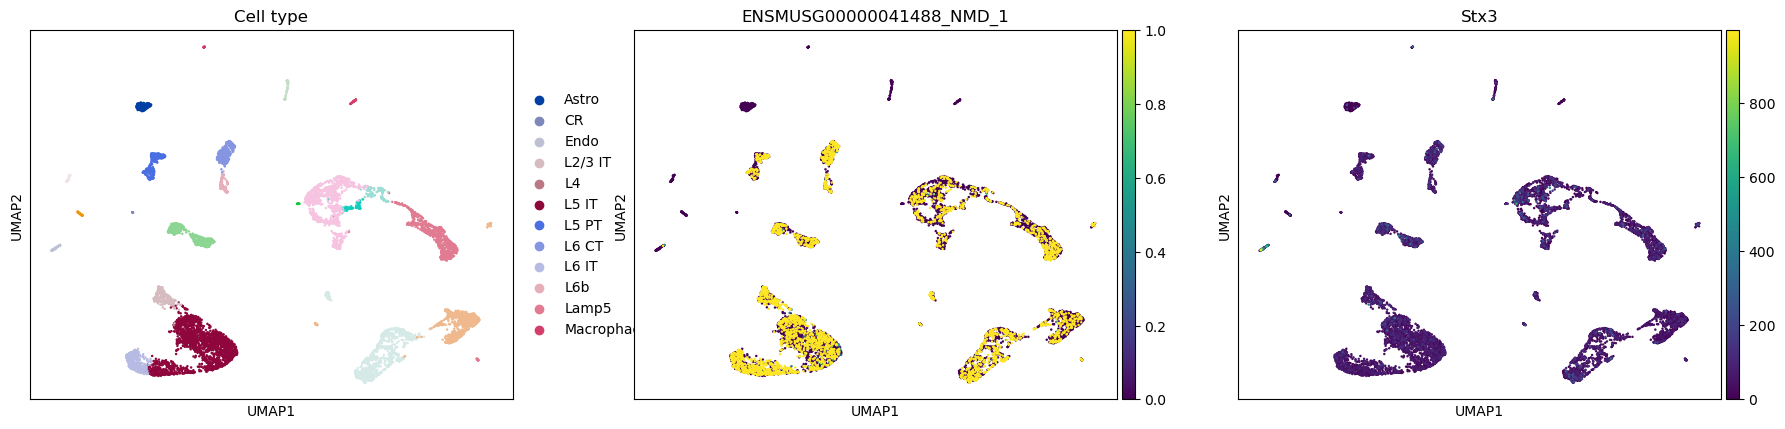

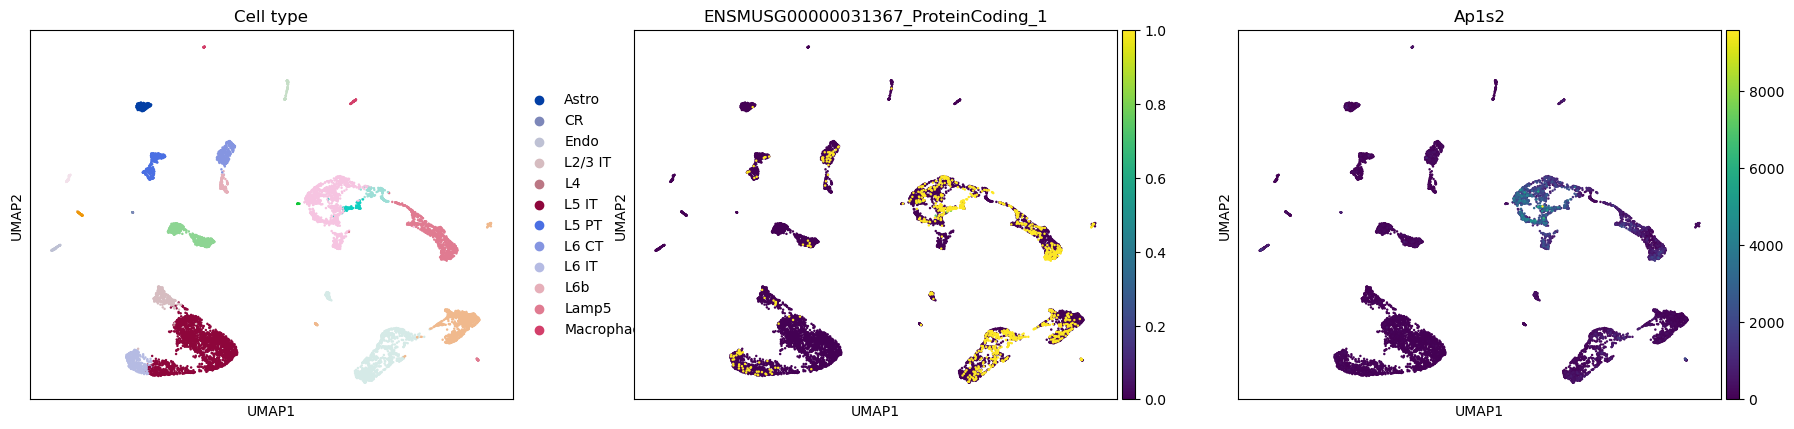

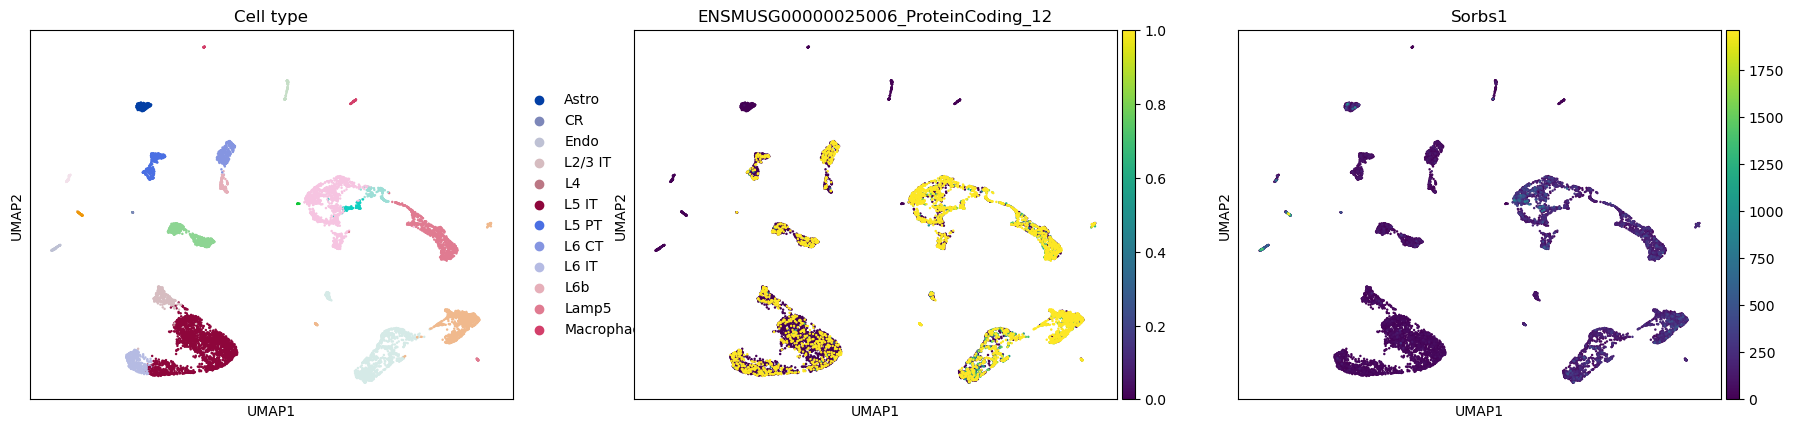

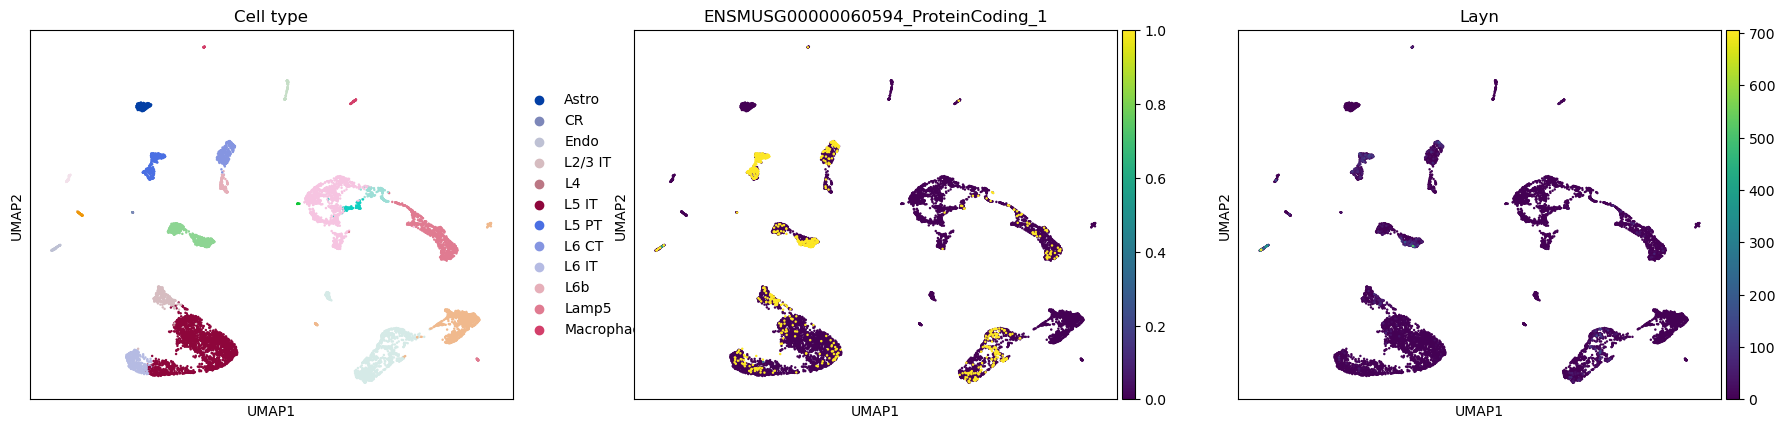

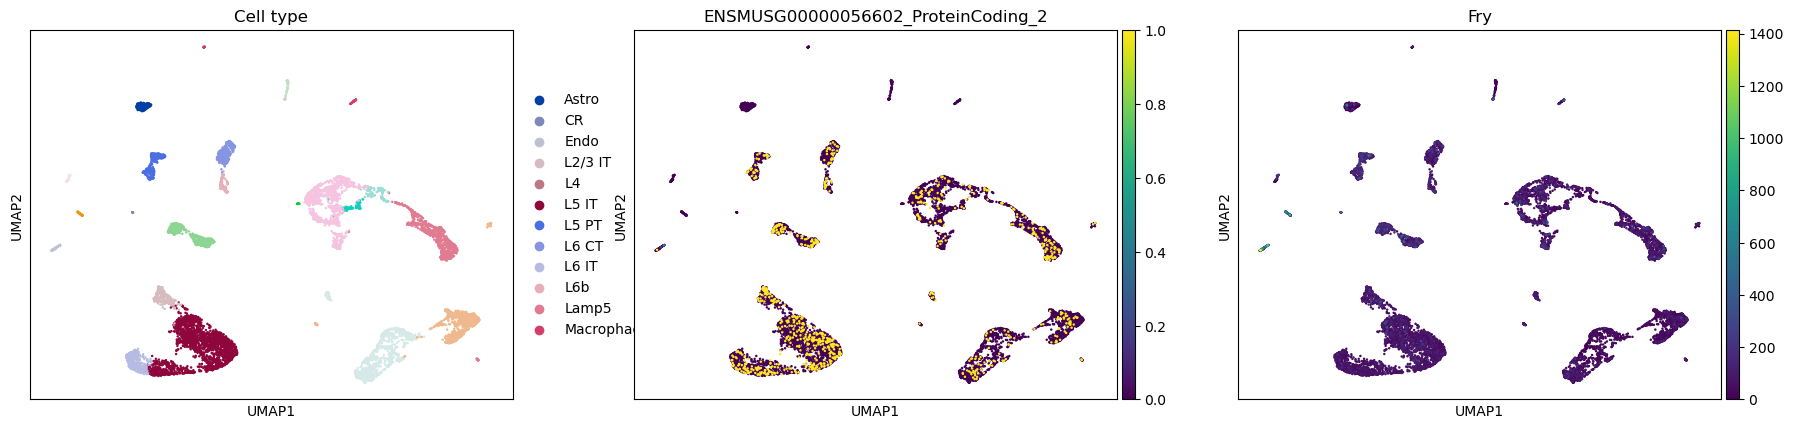

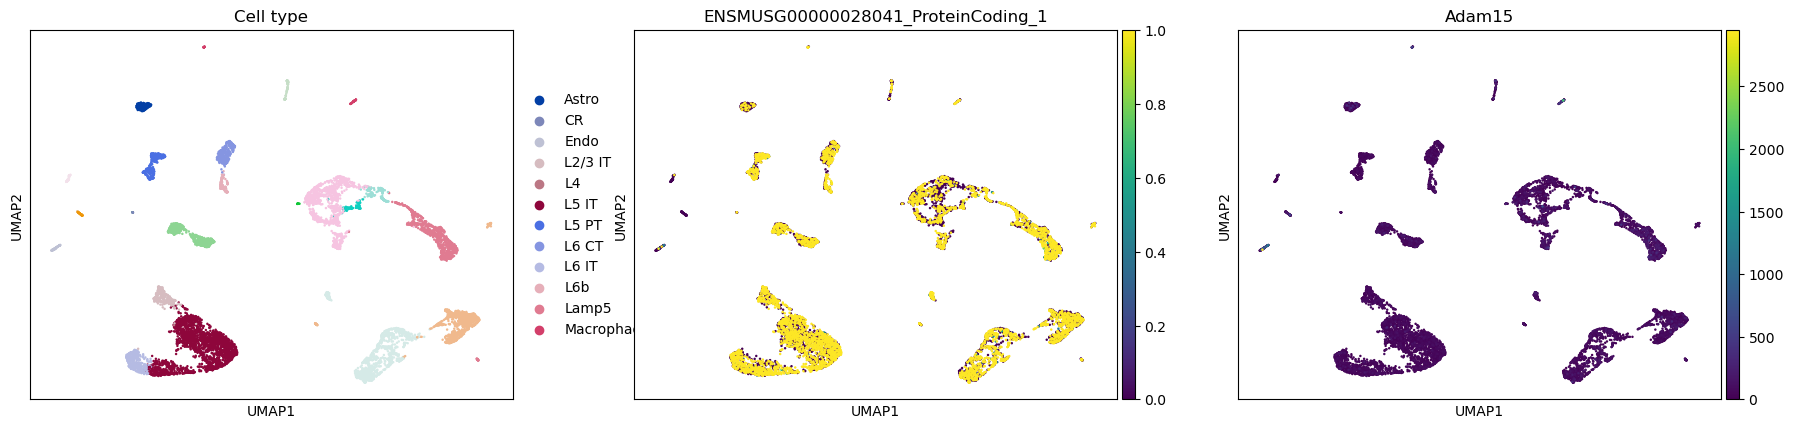

In [217]:
for idx, value in enumerate(top_exons):
    sc.pl.umap(adata_temp, color=["cell_subclass", value, top_genes[idx]], title=["Cell type", value, top_genes[idx]], use_raw=True)

In [ ]:
# adata.raw.var['gene_ids'][adata.raw.var['gene_ids'].str.contains("ENSMUSG00000032076")]

Cadm1    ENSMUSG00000032076.21
Name: gene_ids, dtype: object

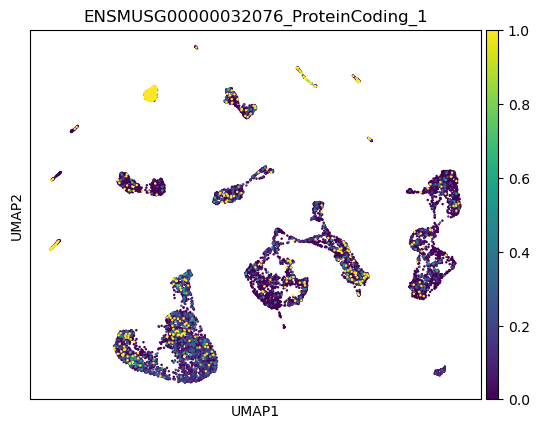

In [ ]:
sc.pl.umap(adata, color=['ENSMUSG00000032076_ProteinCoding_1'])

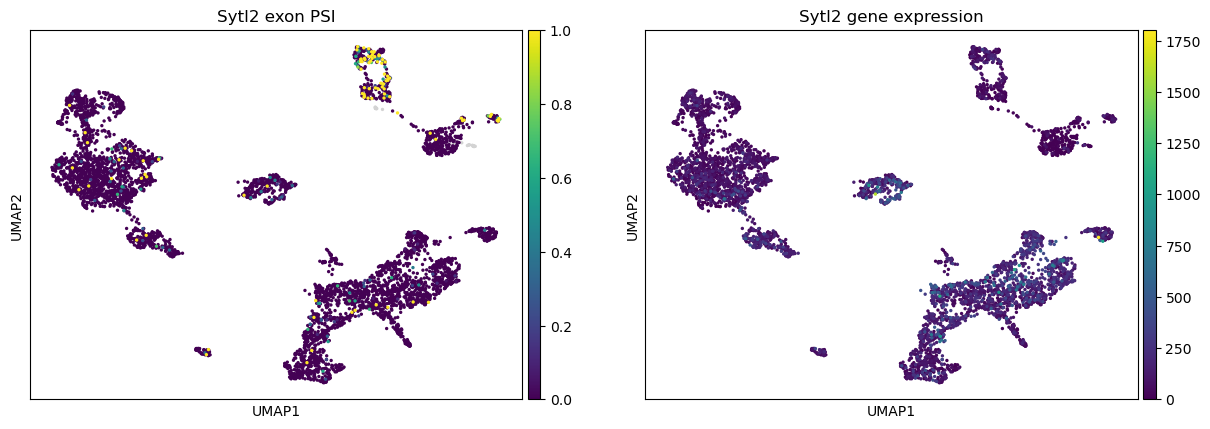

In [ ]:
sc.pl.umap(adata, 
           color=['ENSMUSG00000030616_ProteinCoding_1', 'ENSMUSG00000030616.17'], 
           title=['Sytl2 exon PSI', 'Sytl2 gene expression'])

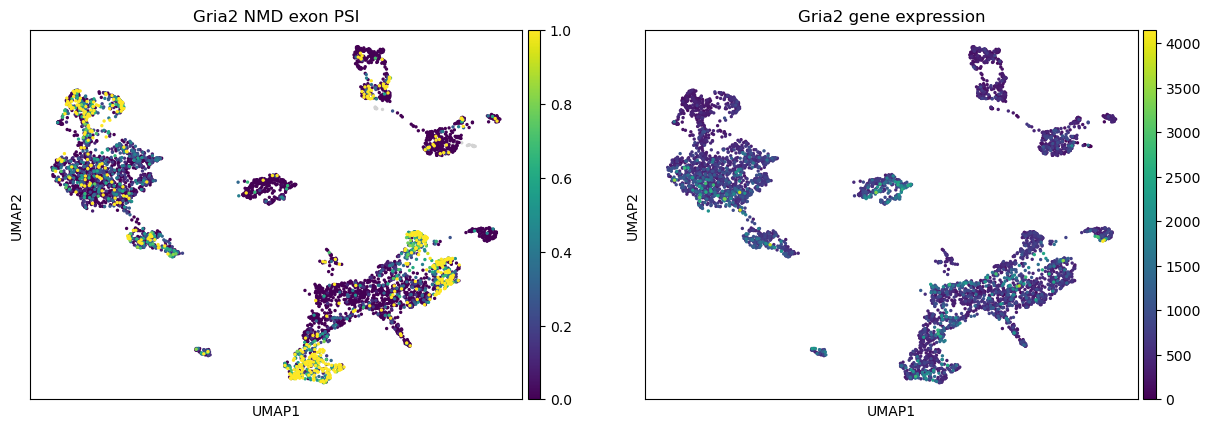

In [ ]:
# Gria2 (2 exons detected)
# Cors: 0.652236089084128, 0.617346540889922
# Cell types: L6 intratelencephalic projecting glutamatergic neuron of the primary motor cortex, L2/3-6 intratelencephalic projecting glutamatergic neuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000033981_NMD_1', 'ENSMUSG00000033981.15'], 
           title=['Gria2 NMD exon PSI', 'Gria2 gene expression'])

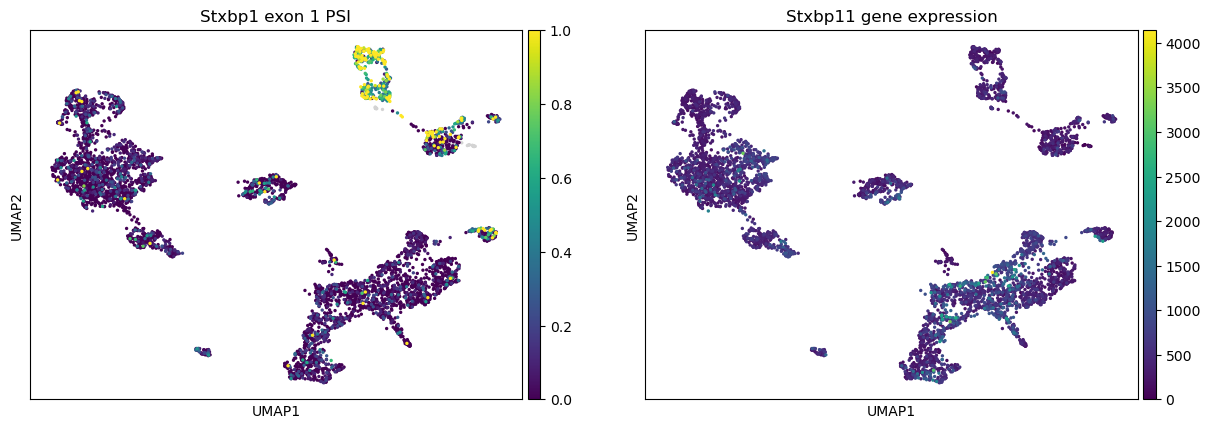

In [ ]:
# Stxbp1 (1 exons detected)
# Cors: 0.744389529352848, 0.706060194824461 
# Cell types: pvalb GABAergic cortical interneuron, sst GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000026797_ProteinCoding_1', 'ENSMUSG00000026797.17'], 
           title=['Stxbp1 exon 1 PSI', 'Stxbp11 gene expression'])

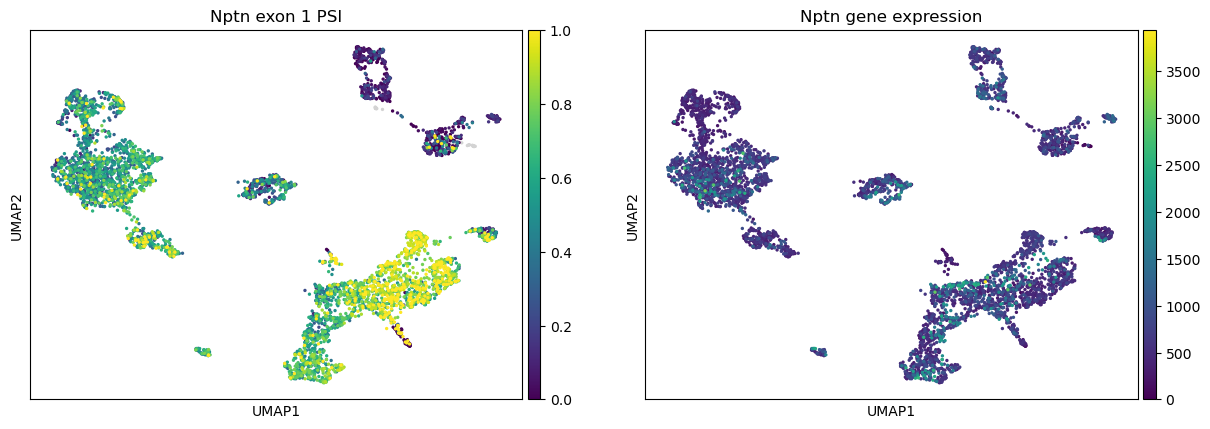

In [ ]:
# Nptn (4 exons detected)
# Cors:
# Cell types: 

sc.pl.umap(adata, 
           color=['ENSMUSG00000032336_ProteinCoding_1', 'ENSMUSG00000032336.19'], 
           title=['Nptn exon 1 PSI', 'Nptn gene expression'])

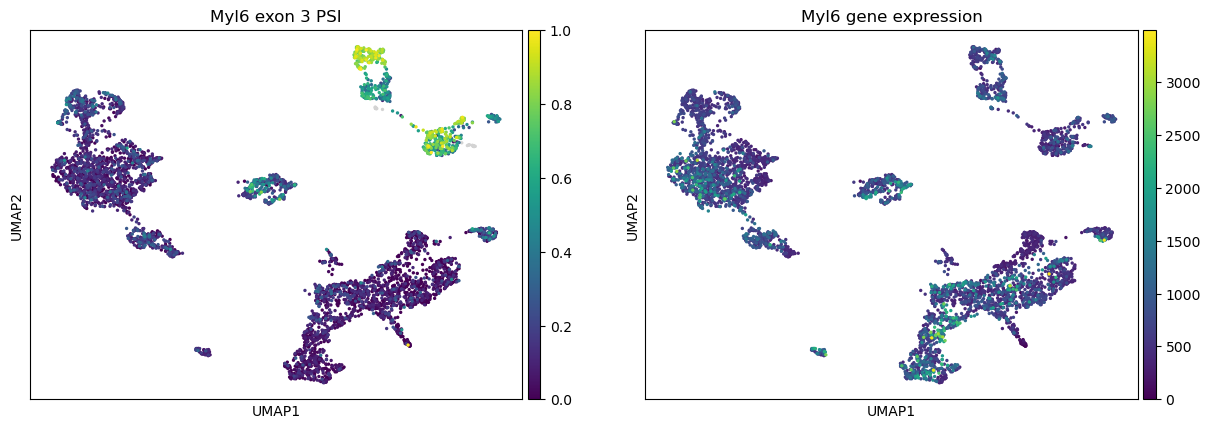

In [ ]:
# Myl6 (2 exons detected)
# Cors: 0.80184095877892, 0.527086088295336, 0.492621807535675
# Cell types: pvalb GABAergic cortical interneuron, sst GABAergic cortical interneuron, vip GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000090841_ProteinCoding_3', 'ENSMUSG00000090841.3'], 
           title=['Myl6 exon 3 PSI', 'Myl6 gene expression'])

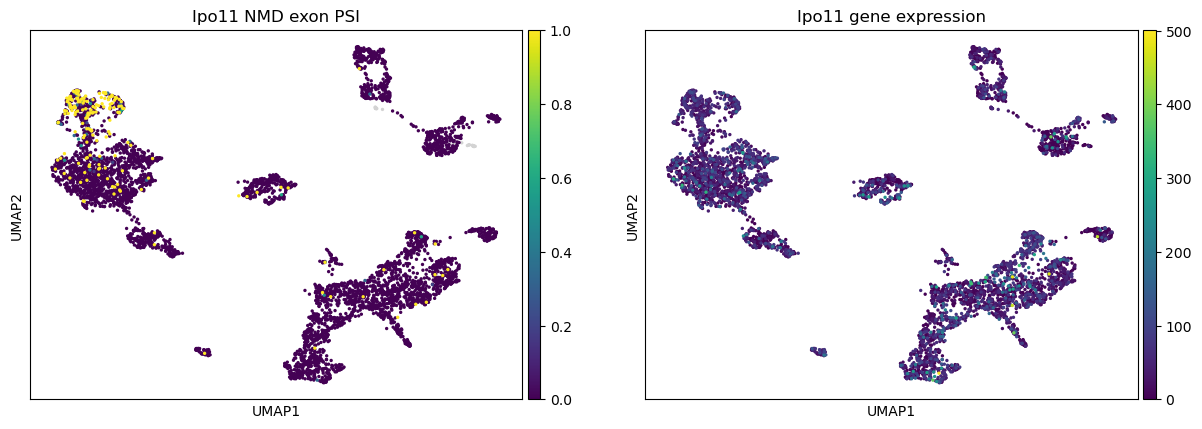

In [ ]:
# Ipo11 (2 exons detected)
# Cors: 0.789167223018318, 0.46043445816633
# Cell types: L6b glutamatergic cortical neuron, L6 corticothalamic-projecting glutamatergic cortical neuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000042590_NMD_1', 'ENSMUSG00000042590.18'], 
           title=['Ipo11 NMD exon PSI', 'Ipo11 gene expression'])

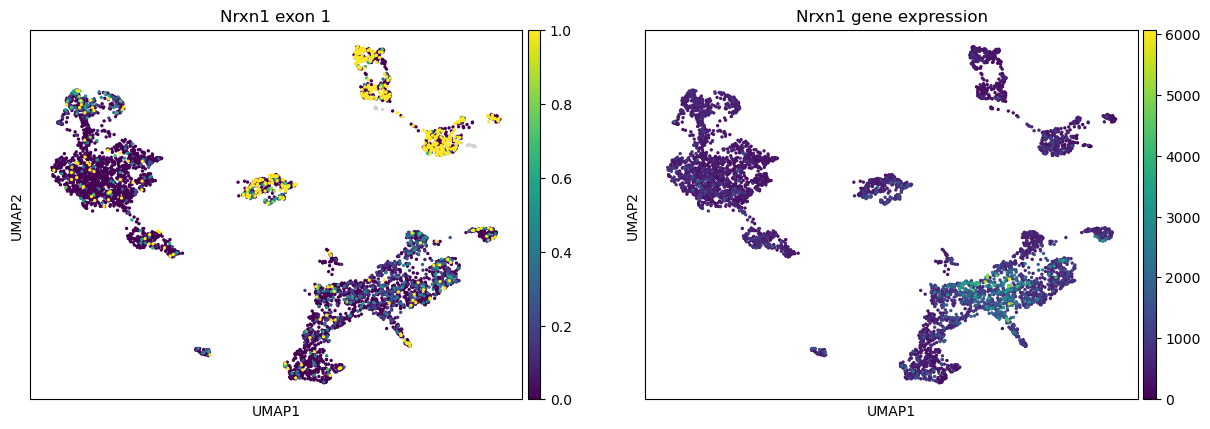

In [ ]:
# Nrxn1 (5 exons detected)
# Cors: 0.61829769769037, 0.425207060075292, 0.349287893333654
# Cell types: vip GABAergic cortical interneuron, L5/6 near-projecting glutamatergic neuron of the primary motor cortex, pvalb GABAergic cortical interneturon

sc.pl.umap(adata, 
           color=['ENSMUSG00000024109_ProteinCoding_1', 'ENSMUSG00000024109.19'], 
           title=['Nrxn1 exon 1', 'Nrxn1 gene expression'])

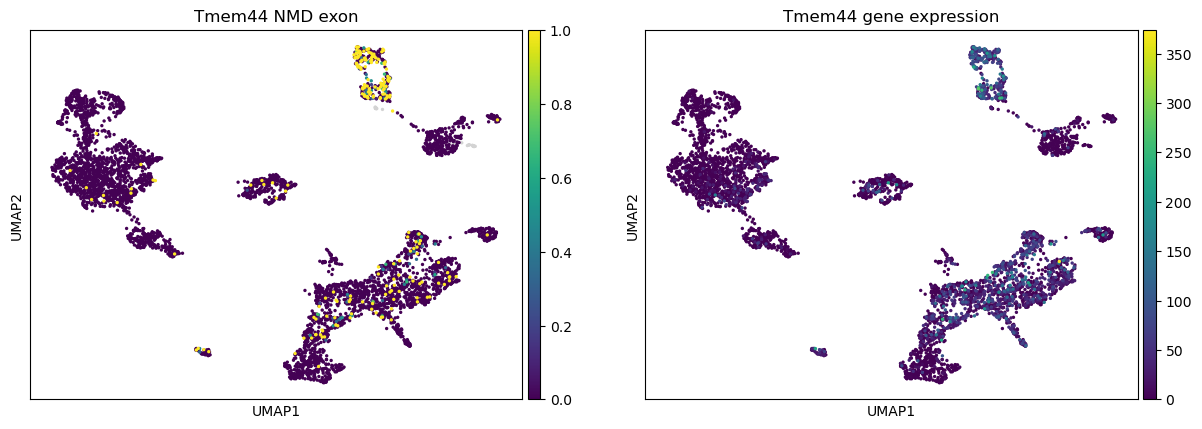

In [ ]:
# Tmem44 (4 exons detected)
# Cors: 0.576198068473254, 0.439915817860295
# Cell types: sst GABAergic cortical interneuron, pvalb GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000022537_NMD_2', 'ENSMUSG00000022537.19'], 
           title=['Tmem44 NMD exon', 'Tmem44 gene expression'])

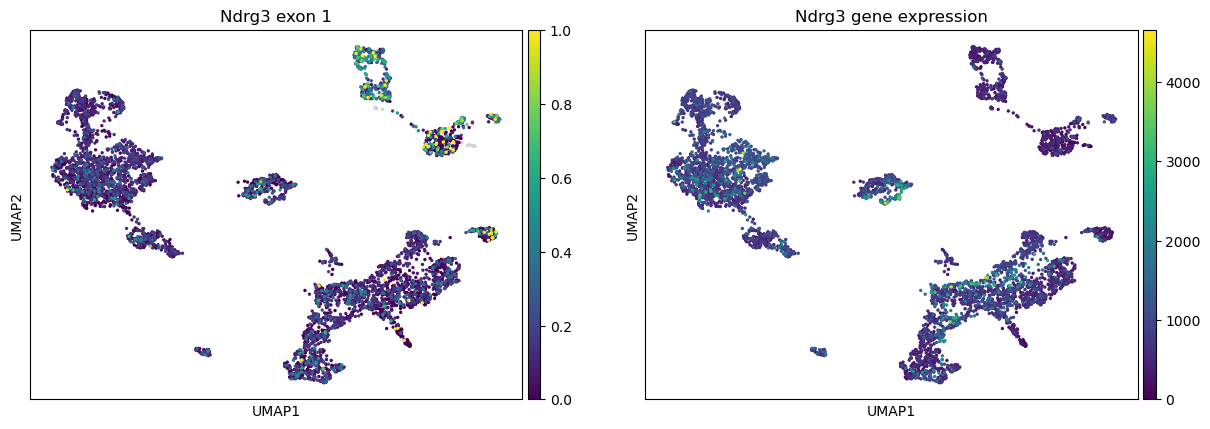

In [ ]:
# Ndrg3
# Cors: 0.516628224952086, 0.381655809491207
# Cell types: pvalb GABAergic cortical interneuron, sst GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000027634_ProteinCoding_1', 'ENSMUSG00000027634.15'], 
           title=['Ndrg3 exon 1', 'Ndrg3 gene expression'])